In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Pokemon.csv']


In [2]:
data = pd.read_csv("../input/Pokemon.csv")

Let's check the data out, How many pokemon are in the dataset?

In [3]:
len(data)

800

In [4]:
data.head(9)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [5]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

So we have 13 features (columns) in our data.

We can see that not all pokemon have dual types e.g. Charmander, so lets replace any NaN values in Type 2 column

In [6]:
data['Type 2'].fillna(value='None',inplace=True)

check the data to see the NaN have bits been updated

In [7]:
data.head(9)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


Nice! lets start doing some visualisation to understand our data

1. How much of each primary type are there?

(pandas.Series.value_counts returns object containing counts of unique values)

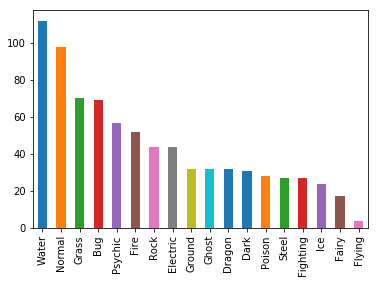

In [8]:
data['Type 1'].value_counts().plot.bar()

Woaahhh so many water types!! we can see that there are not many primary flying types, hmm why dont we look at the type 2 count too!

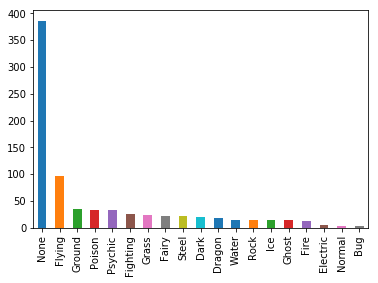

In [9]:
data['Type 2'].value_counts().plot.bar()

So we can see that having a second type is actually quite rare among all the 800 pokemon with almost 50% having no type at all.

In pokemon the Legendary pokemon, were always the coolest. Lets see how many there are?

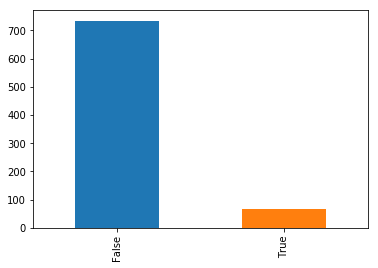

In [10]:
data['Legendary'].value_counts().plot.bar()

Damn! The legendary Pokémon live up to their name of rarity with less than a 1/8 of Pokemon holding that status.

I wonder if any of the other features in the dataset can indicate whether a pokemon is legendary or not!

Lets use a decision tree to model this problem!
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [11]:
from sklearn.model_selection import train_test_split
legendaryPokemon = data.loc[data['Legendary']==True]
normalPokemon = data.loc[data['Legendary']==False]
# we will only use the pokemon battle stats + types to determine whether it is legendary or not 
legendaryPokemon = legendaryPokemon[['Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']]
normalPokemon = normalPokemon[['Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']]

# now we will randomly sample random non-legendary pokemon from the data set to balance our dataset

sampledNormalPokemon = normalPokemon.sample(100)


x = pd.concat([legendaryPokemon, sampledNormalPokemon])
x = pd.get_dummies(x)
# take last column as training labels and drop it from the training data
y = x['Legendary']
x = x.drop('Legendary', 1)

In [12]:
testNormalPokemon = pd.get_dummies(normalPokemon)
testNormalPokemon.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 2_Bug,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,318,45,49,49,65,65,45,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,309,39,52,43,60,50,65,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 47, test_size = 0.30)

In [14]:
# now that we have split our train, test data. Let's increase the amount of Legendary pokemon in our training data, 
# by creating synthetic examples using the SMOTE algorithm
from imblearn.over_sampling import SMOTE

# sampling ration of 1.0 will equally balance the binary classes
sm = SMOTE(random_state=15,sampling_strategy= 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


Using TensorFlow backend.


In [15]:

X_train_res.shape

(150, 43)

In [16]:
(y_train_res == True).sum()

75

In [17]:
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
model = RandomForestClassifier(n_estimators=100,max_depth=7)

In [18]:
#Training the random forest classifier. 
model.fit(X_train_res, y_train_res)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
#Predicting labels on the test set.
y_pred =  model.predict(X_test)

In [20]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train_res, y_pred=model.predict(X_train_res)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  1.0


In [21]:
# feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
Total,0.253
Sp. Atk,0.205
Speed,0.125
HP,0.114
Attack,0.074
Sp. Def,0.068
Defense,0.062
Type 1_Psychic,0.027
Type 1_Dragon,0.008


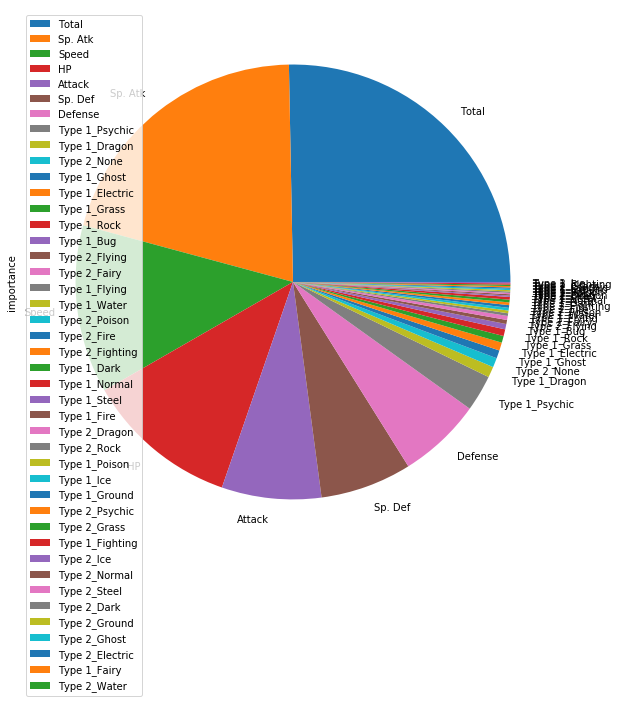

In [22]:
plot = importances.plot.pie(y='importance', figsize=(10, 10))

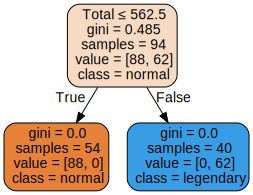

In [23]:
import sklearn.tree 
import graphviz 

# Extract single tree
estimator = model.estimators_[4]

dot_data = dot_data = sklearn.tree.export_graphviz(estimator, out_file=None, 
               feature_names=x.columns,  
                class_names=['normal','legendary'] , filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data) 

graph